In [1]:
#import packages
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#import googleplaystore.csv filre
df = pd.read_csv('/users/mona/Desktop/google-play-store-apps/googleplaystore.csv')


#drop columns with "nan" value
df1= df.dropna(subset=['Rating'])
df1.head()

#import user_reviews.csv file
df2 = pd.read_csv('/users/mona/Desktop/google-play-store-apps/user_reviews.csv')
df2=df2.dropna(subset=['Translated_Review'])


df3=pd.merge(df1,df2, on='App')


#Create dataframe 4 that only contains entertainment category

df4=df3[df3.Category.str.contains("GAME")==True]
df4.duplicated()
df4=df4.drop_duplicates()
df4=df4.reset_index()
df4.head()


,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,24254,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,"If get free lives refill, continue accumulate ...",Positive,0.374411,0.556987
1,24255,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,My original rating 01/2015 5 Stars still holdi...,Positive,0.250000,0.475000
2,24256,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,"This good time passing game. However, I like l...",Positive,0.200926,0.437963
3,24257,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,"Fun first, spending two weeks level makes want...",Positive,0.183333,0.296825
4,24258,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up,Please get rid amount pop ups love things holy...,Positive,0.319444,0.600000


In [44]:
positive=pd.read_csv('/users/mona/Desktop/google-play-store-apps/game_positive_review.txt', header=None)
print(positive)

                0
0             fun
1       knowledge
2            nice
3            love
4       recommend
5   concentration
6       fantastic
7           power
8     unskippable
9         support
10       accurate
11            win
12      beautiful
13          liked
14      childhood


In [45]:
negative=pd.read_csv('/users/mona/Desktop/google-play-store-apps/game_negative_review.txt', header=None)
print(negative)

              0
0         stuck
1     confusing
2      terrible
3    unpleasant
4         avoid
5         waste
6           bad
7          hate
8      opponent
9          pool
10       boring
11        tough
12    brainless
13     deleting
14  frustrating
15        crush


In [24]:
def pre_process(text):
    
    #lowercase
    text=text.lower()
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # remove special characters and digits
    text=re.sub("(\\W)+"," ",text)
    
    return text

In [41]:
for row in negative.iterrows():
    keyword=row[1].to_string().replace("0    ","");
    df4[keyword]= df4.Translated_Review.str.split(keyword).str.len()-1

In [42]:
for row in positive.iterrows():
    keyword=row[1].to_string().replace("0    ","");
    df4[keyword]= df4.Translated_Review.str.split(keyword).str.len()-1

df4.head()

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,...,bad,hate,opponent,pool,boring,tough,brainless,deleting,frustrating,crush
0,24254,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,...,0,0,0,0,0,0,0,0,0,0
1,24255,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,...,0,0,0,0,0,0,0,0,0,0
2,24256,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,...,0,0,0,0,0,0,0,0,0,0
3,24257,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,...,0,0,0,0,0,0,0,0,0,0
4,24258,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df5=df4.groupby(['App','Rating']).sum()

df5 = df5.reset_index();
#df8=df8.drop(['App'],1)
data=df5.drop(['App','Sentiment_Polarity','Sentiment_Subjectivity'],1)
data.head()

,Rating,index,fun,knowledge,nice,love,recommend,concentration,fantastic,power,unskippable,support,accurate,win,beautiful,liked,childhood
0,4.6,1710855,1,1,2,1,1,0,0,0,1,0,0,0,1,0,1
1,3.8,1428790,3,0,0,1,0,1,0,0,0,0,1,1,0,1,0
2,4.5,18104358,36,0,12,60,0,0,0,30,0,12,6,174,0,6,0
3,4.2,8255126,22,0,2,10,2,0,0,0,0,2,0,2,0,0,0
4,4.6,8254250,30,0,18,38,8,0,4,6,0,4,0,8,32,4,0


In [30]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering

In [48]:
def doKmeans(X, nclust=4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(data,4)
df6=kmeans = pd.DataFrame(clust_labels)
df6.head()
#data.insert((data.shape[1]),'kmeans',kmeans)

,0
0,2
1,2
2,1
3,3
4,3


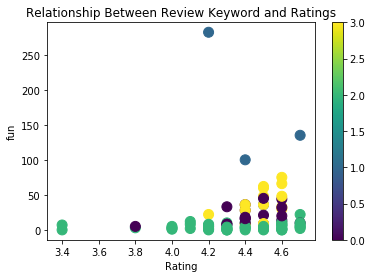

In [49]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(data['Rating'],data['fun'],
                     c=kmeans[0],s=100)
ax.set_title('Relationship Between Review Keyword and Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('fun')
plt.colorbar(scatter)

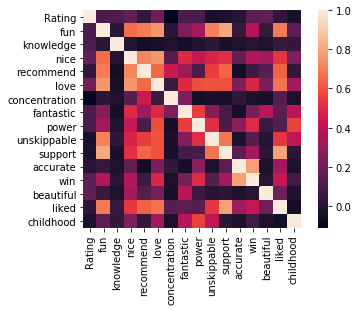

In [50]:
#correlation analysis: rating and positive key word
df6 = data[['Rating','fun','knowledge','nice', 'recommend','love',
          'concentration','fantastic','power','unskippable','support','accurate','win','beautiful','liked','childhood']] #Subsetting the data
cor = df6.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True)